In [2]:
import cvxpy as cp
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
e = np.exp(1)
# input dimension
d=10
# number of quadratic pieces
n = 5
# number of iterations of gradient descent
ITER = 200
# learning rate
lr = 0.8

# define the maxquad function
A = np.zeros((n,d,d))
b = np.zeros((n,d))

for k in range(1,n+1,1):
	for i in range(1,d+1,1):
		for j in range(1,d+1,1):
			if j > i:
				A[k-1,i-1,j-1] = (e**(i/j)) * np.cos(i*j) * np.sin(k)

	for i in range(1,d+1,1):
		for j in range(1,d+1,1):
			if j < i:
				A[k-1,i-1,j-1] = A[k-1,j-1,i-1]
		b[k-1,i-1] = (e**(i/k)) * np.sin(i*k)

	for i in range(1,d+1,1):
		A[k-1,i-1,i-1] = np.sum(np.abs(A[k-1,i-1,:])) + i/d * np.abs(np.sin(k))

In [4]:
# define evaluation of quad(k) on input x
def quad(k,x):
	return np.dot(np.matmul(A[k,:,:],x), x) - np.dot(b[k,:],x)
# define maxquad function
def maxquad(x):
	return np.max([quad(k,x) for k in np.arange(n)])
# define maxquad gradient
def maxquad_gradient(x):
	allevals = [quad(k,x) for k in np.arange(n)]
	idx = np.argmax(allevals)
	return 2*np.matmul(np.transpose(A[idx,:,:]), x) - b[idx,:]

def f_i(x, x_j):
    return np.max([maxquad(j) + maxquad_gradient(j)@(x - j) for j in x_j])
# define f_i_minus function
# def f_i_minus(x_j):
#     # x = cp.Variable(d)
#     # obj = cp.Minimize(f_i(x,x_j))
#     # constraints = [x >= -10000, x <= 10000]
#     # prob = cp.Problem(obj, constraints)
#     # return prob.solve()
#     allvals = []
#     for j in x_j:
#         x = cp.Variable(d)
#         obj = cp.Minimize(maxquad(j) + maxquad_gradient(j)@(x - j))
#         # obj = cp.Minimize(f_i(x,j))
#         constraints = [x >= -100, x <= 100]
#         prob = cp.Problem(obj, constraints)
#         allvals.append(prob.solve())
#     return np.max(allvals)
def f_i_minus(x_j):
    opts = []
    for j in x_j:
        x = cp.Variable(d)
        obj = cp.Maximize(maxquad(j) + maxquad_gradient(j)@(x - j))
        constraints = [x <= 100, x >= -100]
        prob = cp.Problem(obj, constraints)
        opts.append(prob.solve())
    max_j = x_j[np.argmax(opts)]
    # print(opts)
    x = cp.Variable(d)
    obj = cp.Minimize(maxquad(max_j) + maxquad_gradient(max_j)@(x - max_j))
    constraints = [x <= 100,x >= -100]
    prob = cp.Problem(obj, constraints)
    return prob.solve()
# define f_i_plus function
def f_i_plus(x_j):
    # return np.min([maxquad(j) + maxquad_gradient(j) for j in x_j])
    return np.min([maxquad(j) for j in x_j])
# form the level
def level(fm, fp):
    return (1 - lr)*fm + lr*fp
# calculate x_{i+1}
# def update_x(x_i, x_j, level_i):
#     x = cp.Variable(d)
#     obj = cp.Minimize(cp.sum_squares(x - x_i))
#     # print(cp.max(cp.vstack([maxquad(j) + maxquad_gradient(j)@(x - j) for j in x_j])))
#     constraints = [cp.vstack([maxquad(j) + maxquad_gradient(j)@(x - j) for j in x_j]) <= level_i,
#                     x <= 100,
#                     x >= -100]
#     prob = cp.Problem(obj, constraints)
#     prob.solve()
#     return x.value

def update_x(x_i, x_j, level_i):
    opt = []
    for j in x_j:
        x = cp.Variable(d)
        obj = cp.Maximize(maxquad(j) + maxquad_gradient(j)@(x - j))
        constraints = [x <= 100,
                        x >= -100,
                        maxquad(j) + maxquad_gradient(j)@(x - j) <= level_i]
        prob = cp.Problem(obj, constraints)
        opt.append(prob.solve())
    max_j = x_j[np.argmax(opt)]
    x = cp.Variable(d)
    obj = cp.Minimize(cp.sum_squares(x - x_i))
    constraints = [x <= 100,
                    x >= -100,
                    maxquad(max_j) + maxquad_gradient(max_j)@(x - max_j) <= level_i]
    prob = cp.Problem(obj, constraints)                    
    prob.solve()    
    solution = x.value
    return solution


In [5]:
x = np.ones(d)
val = np.zeros(ITER)
search_pts = [x]
for t in range(ITER):
    print('Iteration ', t)
    fm = f_i_minus(search_pts)
    fp = f_i_plus(search_pts)
    l_i = level(fm,fp)
    # print('x', x)
    # print('fm, fp, li:', fm, fp, l_i)
    x = update_x(x,search_pts,l_i)
    # print('x_next', x)
    search_pts.append(x)
    val[t] = maxquad(x)

for i in np.arange(ITER):
	val[i] = np.min(val[0:i+1])

gap = val - (-0.8414077)*np.ones(ITER)

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Iteration  32
Iteration  33
Iteration  34
Iteration  35
Iteration  36
Iteration  37
Iteration  38
Iteration  39
Iteration  40
Iteration  41
Iteration  42
Iteration  43
Iteration  44
Iteration  45
Iteration  46
Iteration  47
Iteration  48
Iteration  49
Iteration  50
Iteration  51
Iteration  52
Iteration  53
Iteration  54
Iteration  55
Iteration  56
Iteration  57
Iteration  58
Iteration  59
Iteration  60
Iteration  61
Iteration  62
Iteration  63
Iteration  64
Iteration  65
Iteration  66
Iteration  67
Iteration  68
Iteration  69
Iteration  70
Iteration  71
It

/var/folders/q4/trxghvfn21sdx12kbtpt92n00000gn/T/ipykernel_26726/2766736760.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(ITER)), -np.log(gap))


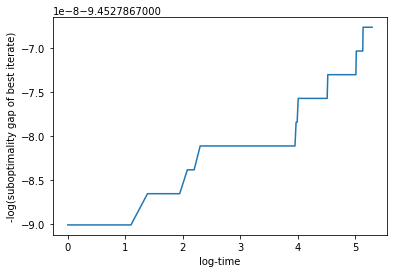

In [6]:
plt.plot(np.log(np.arange(ITER)), -np.log(gap))
plt.ylabel('-log(suboptimality gap of best iterate)')
plt.xlabel('log-time')
plt.show()